In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# %matplotlib inline
# %matplotlib ipympl

In [9]:
d = np.loadtxt("dataset3.txt", delimiter=" ")
x = d[0:, 0]
y = d[0:, 1]

d

array([[ 2.00000000e+15, -2.65041716e-10],
       [ 1.99933289e+15,  2.65133067e-10],
       [ 1.99866578e+15, -9.79238844e-10],
       ...,
       [ 1.33422282e+12, -7.32343865e-10],
       [ 6.67111409e+11, -4.73025873e-10],
       [ 1.00000000e+03,  9.88757713e-10]])

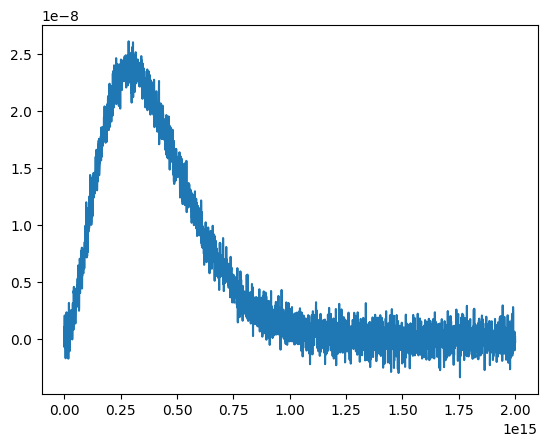

In [10]:
plt.plot(x,y)

In [11]:
c = 3e8
kB = 1.38e-23
def planck(nu, T, h):
    return 2 * (h * nu ** 3) / (c ** 2) / (np.exp(h * nu / (kB * T)) - 1)

(T1, h1), pcov1 = curve_fit(planck, x, y, 
                         p0=[5000, 6e-34]
                        )
(T2, h2), pcov2 = curve_fit(planck, x, y, 
                         p0=[6000, 7e-34]
                        )
# (T3, h3), pcov3 = curve_fit(planck, x, y, 
#                          p0=[12000, 10e-30]
#                         )

# the starting point 12000, 10e-30 diverges; 

h_actual = 6.62607015e-34

print(f"Temperature is {T1} K")
print(f"Planck's constant is estimated to be {h1} Js")
# print(f" error = {np.abs(1 - (h / h_actual)) * 100:.2}%")

Temperature is 4992.956539252551 K
Planck's constant is estimated to be 6.610979075434727e-34 Js


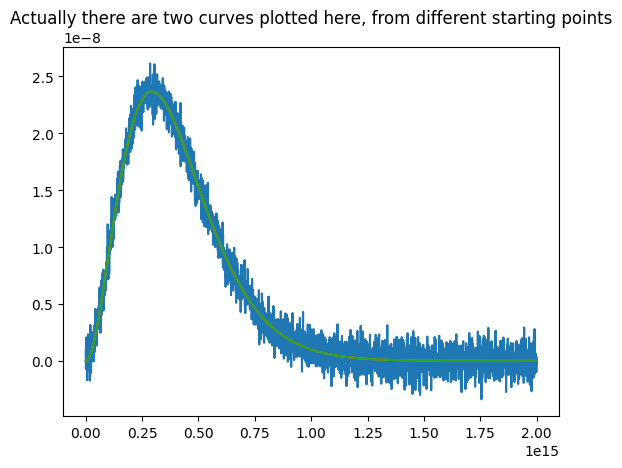

In [12]:
plt.figure()
plt.plot(x,y)
plt.title("Actually there are two curves plotted here, from different starting points")
plt.plot(x,planck(x, T1, h1))
plt.plot(x,planck(x, T2, h2))

plt.show()